# **Diabetes Prediction**

From healthcare diabetes prediction dataset we are predicting the presence or absence of diabetes.

# Import Libraries

In [110]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading Dataset

In [111]:
data = pd.read_csv("Healthcare_Diabetes.csv")


In [112]:
df = data.copy()

In [113]:
data

,Sr.No,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


In above dataset their are 8 input independent Features and 1 dependent feature which is our target i.e. outcome column. Here in outcome we have 2 values i.e. 0 and 1 means it is a binary classification data.

# Exploratory Data Analysis

In [114]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sr.No,2768.0,1384.500000,799.197097,1.000,692.750,1384.500,2076.250,2768.00
Pregnancies,2768.0,3.742775,3.323801,0.000,1.000,3.000,6.000,17.00
Glucose,2768.0,121.102601,32.036508,0.000,99.000,117.000,141.000,199.00
BloodPressure,2768.0,69.134393,19.231438,0.000,62.000,72.000,80.000,122.00
SkinThickness,2768.0,20.824422,16.059596,0.000,0.000,23.000,32.000,110.00
Insulin,2768.0,80.127890,112.301933,0.000,0.000,37.000,130.000,846.00
BMI,2768.0,32.137392,8.076127,0.000,27.300,32.200,36.625,80.60
DiabetesPedigreeFunction,2768.0,0.471193,0.325669,0.078,0.244,0.375,0.624,2.42
Age,2768.0,33.132225,11.777230,21.000,24.000,29.000,40.000,81.00
Outcome,2768.0,0.343931,0.475104,0.000,0.000,0.000,1.000,1.00


From above describe method we understand the distribution and characteristics of our data and further data preprocessing, exploration, and model development steps.

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sr.No                     2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


Info method shows us the structure of dataframe and identifying missing values, and understanding the data types of each column.

In [116]:
data.isnull().sum()

Sr.No                       0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

we can see their are not null values in data.

In [117]:
data.duplicated().sum()

0

In [118]:
data.shape

(2768, 10)

We have 10 columns and 2768 rows in the dataset.

In [119]:
data.drop(['Sr.No'] , axis=1 , inplace=True)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Visualization

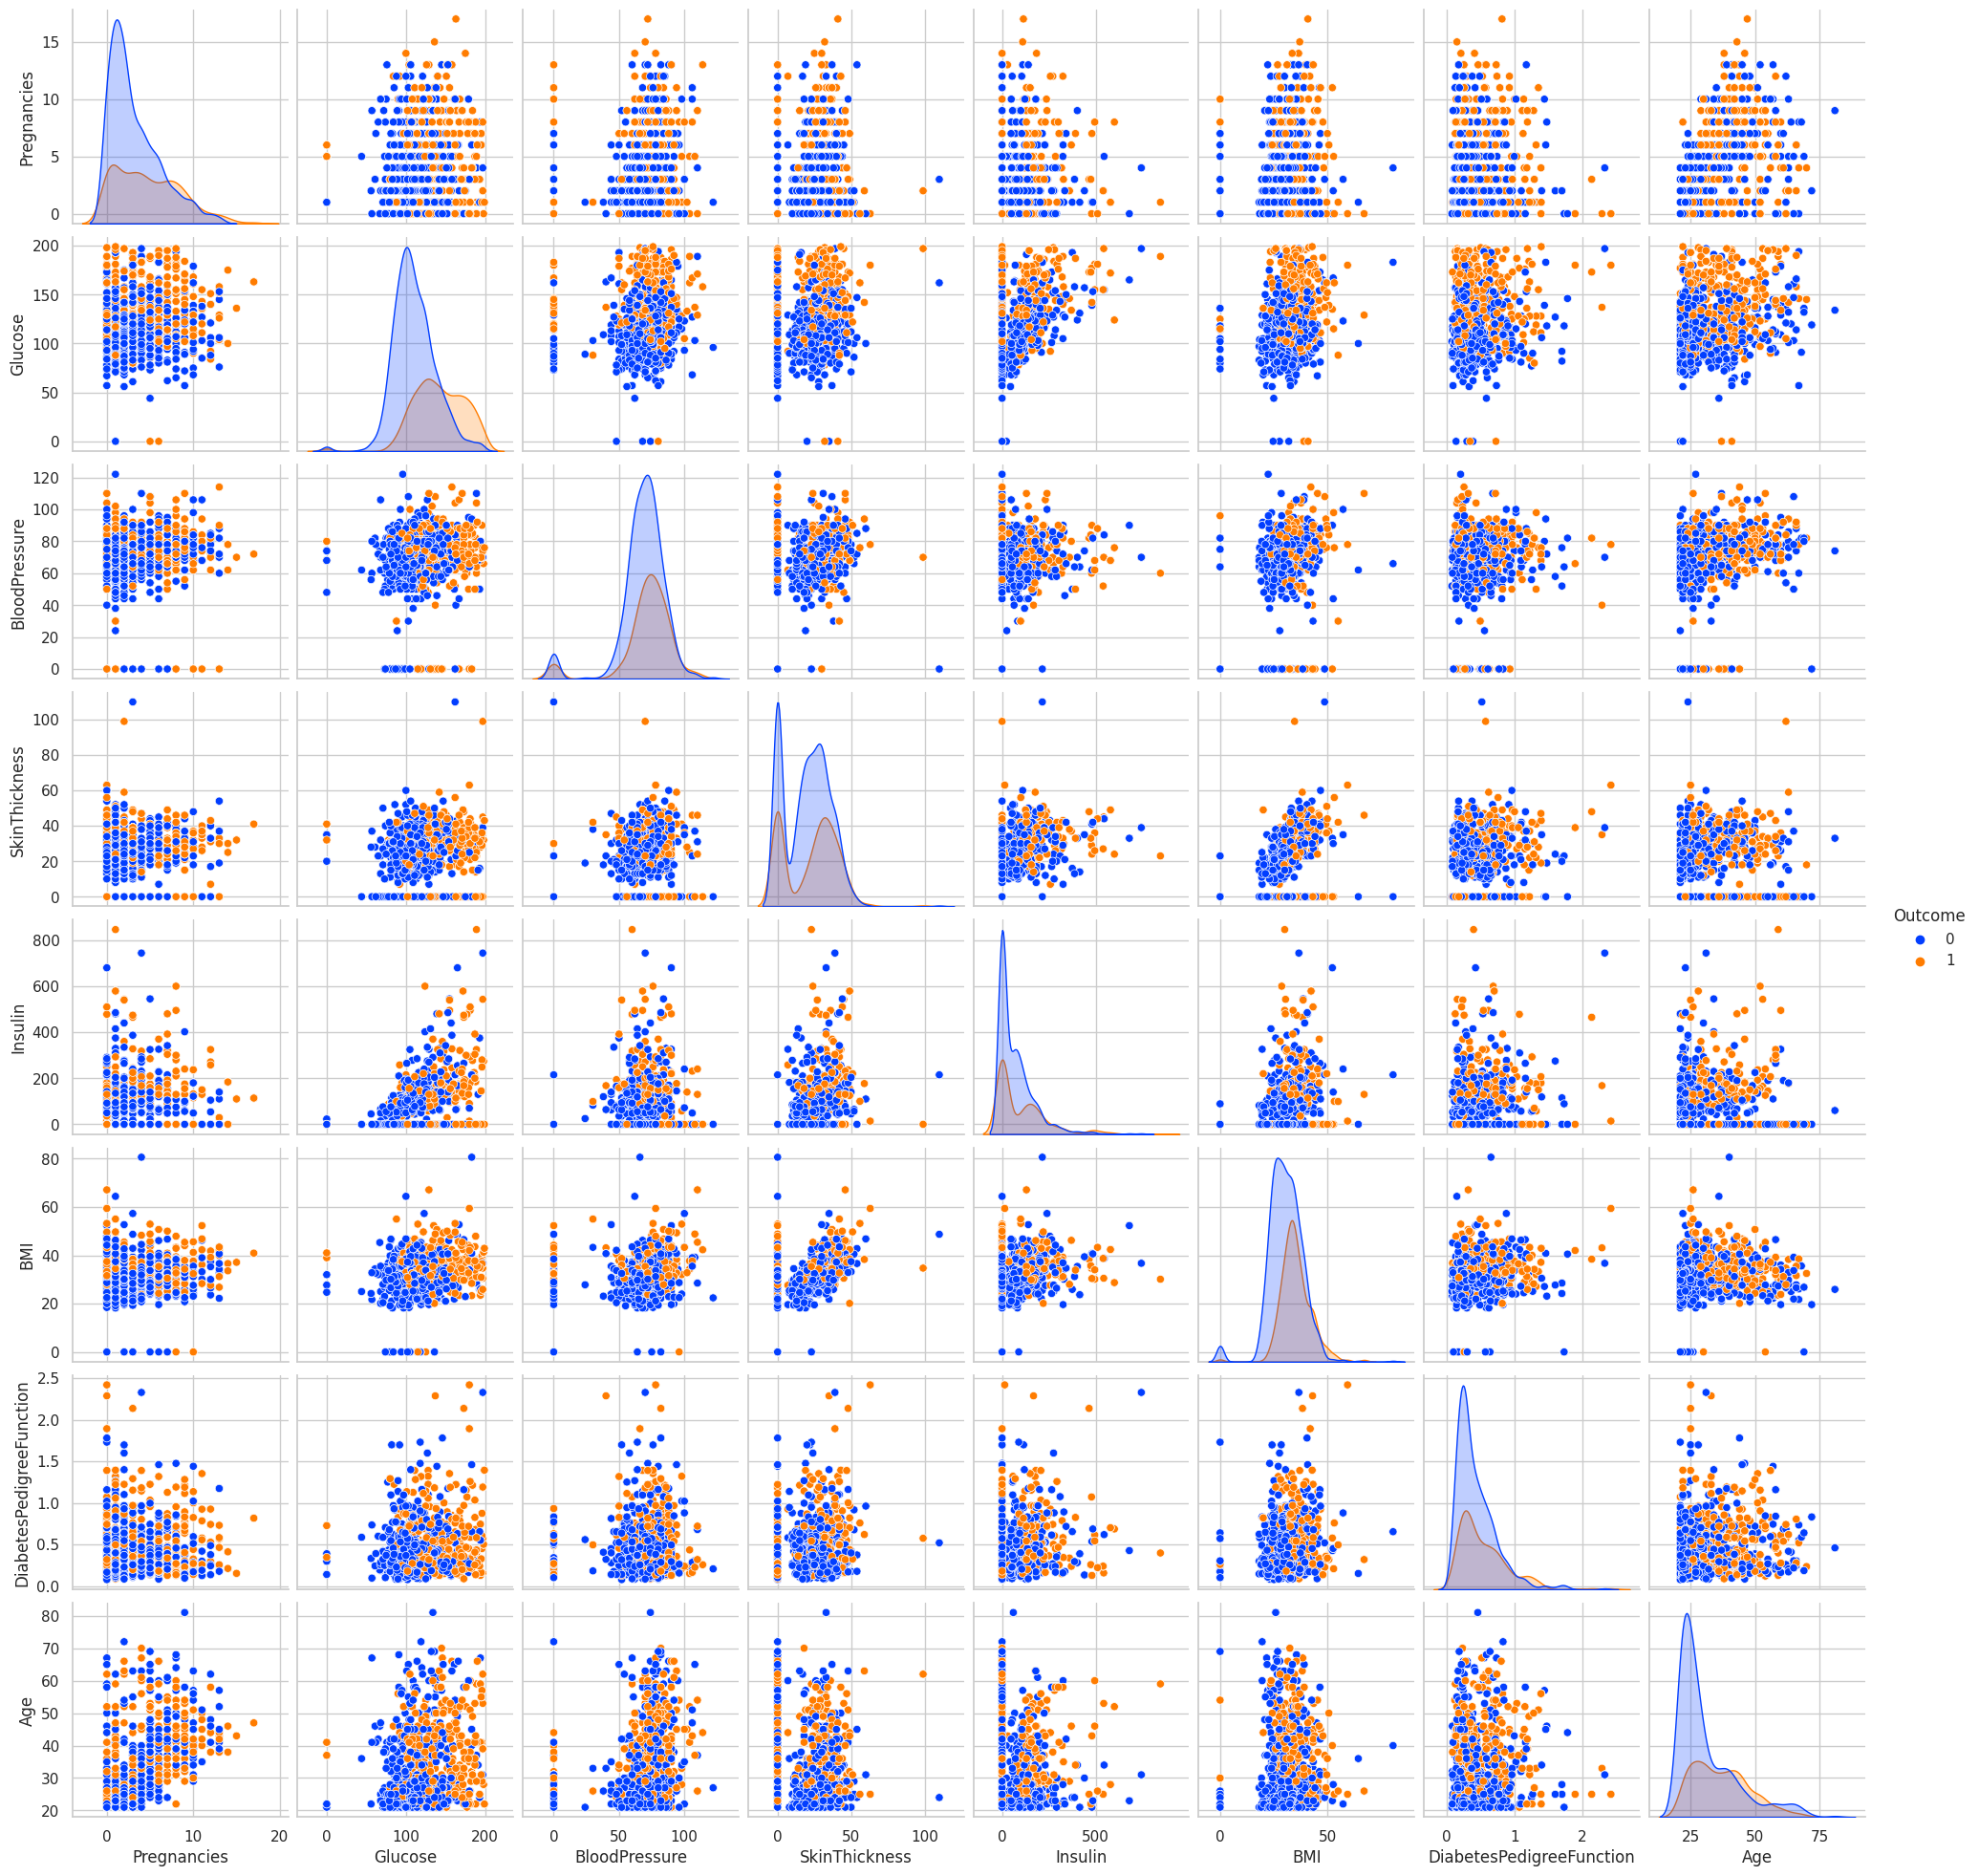

In [120]:
sns.pairplot(data=data,hue='Outcome',kind='scatter',palette='bright')

Pairplot shows that the data is linear or non-linear. Here we have classification type of data.

<Axes: ylabel='Outcome'>

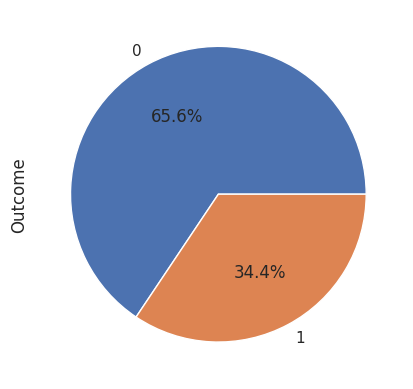

In [121]:
data["Outcome"].value_counts().plot(kind="pie", autopct="%1.1f%%")

Above Pie chart shows that for the 0 almost 66% data is taken and for 1 34% data is taken to check. From this we can say that distribution of data is not properly balanced.

<Axes: xlabel='Age', ylabel='Insulin'>

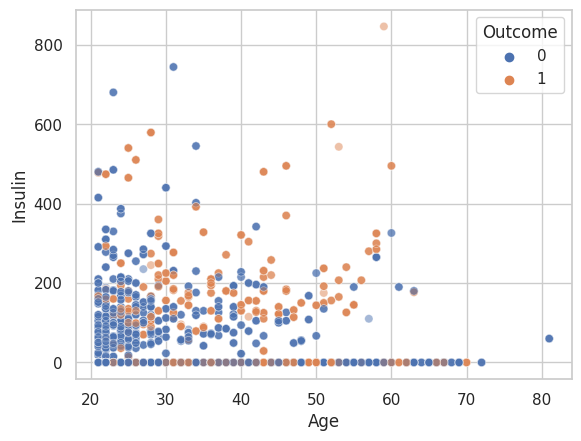

In [122]:
plt.figure(dpi=100)
sns.scatterplot(data=data,x='Age',y='Insulin',hue='Outcome',alpha=0.5)

The above scatter plot shows us the relation of Age and Insulin feature with each other. Age from 40 to 60 have high insulin level so they are highly prone to diabetes.

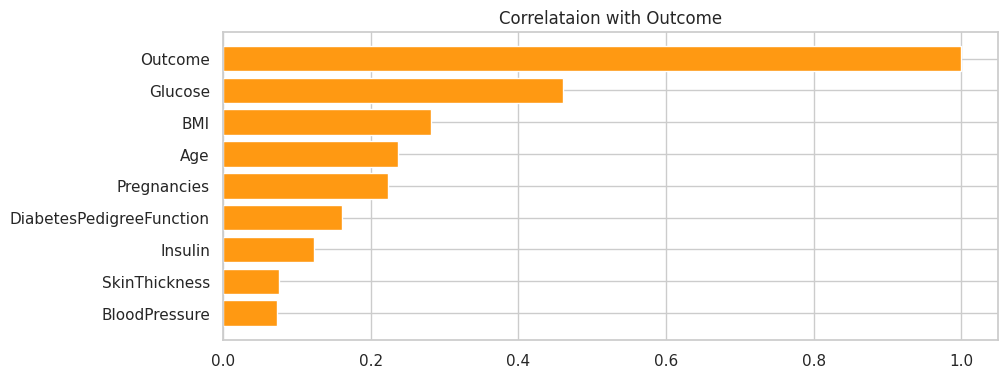

In [123]:
fig = plt.figure(figsize = (10, 4))
outcome_corr = pd.DataFrame(data.corr()['Outcome'].sort_values(ascending = True))
plt.barh(outcome_corr.index, outcome_corr['Outcome'],color="#FF9912")
plt.title('Correlataion with Outcome')
plt.show()

From above we can see the correlation of each independent feature with target feature i.e. Outcome.

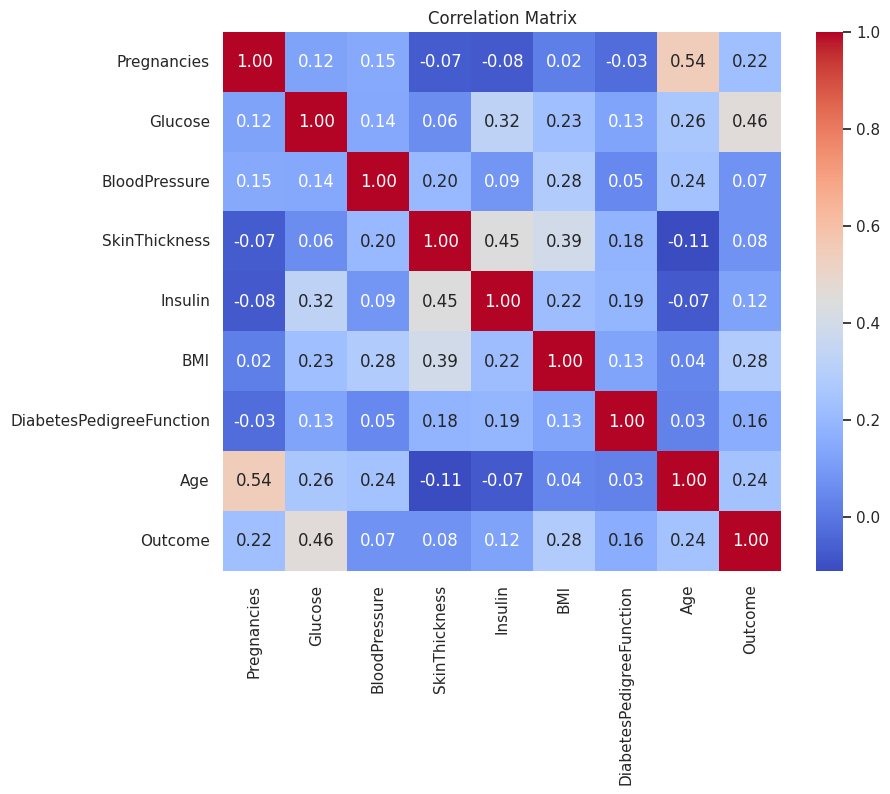

In [124]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

From above correlation matrix we can conclude none of the Independent feature is highly correlated with each other. So we can not drop any of the feature.

# **Histplot For Variables**

Text(0, 0.5, 'Frequency')

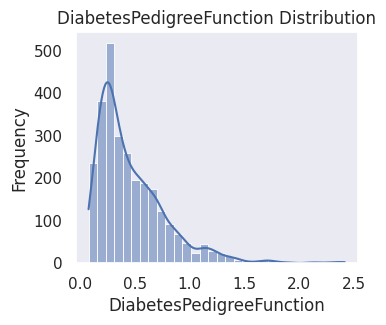

In [125]:
sns.set(style="dark")
# Histogram for DiabetesPedigreeFunction
plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='DiabetesPedigreeFunction',bins=30, kde=True)
plt.title('DiabetesPedigreeFunction Distribution')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

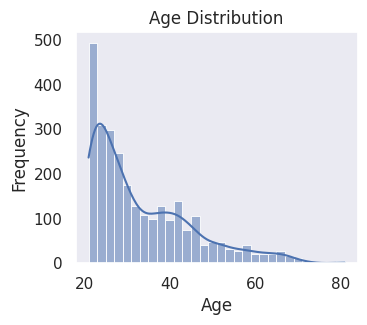

In [126]:
sns.set(style="dark")
# Histogram for Age
plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='Age',bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

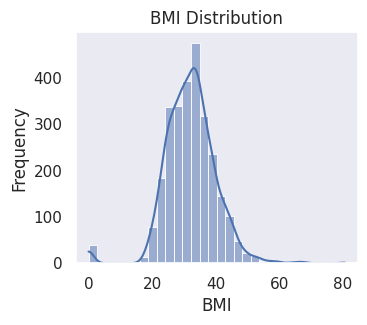

In [127]:
sns.set(style="dark")
# Histogram for BMI
plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='BMI',bins=30, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

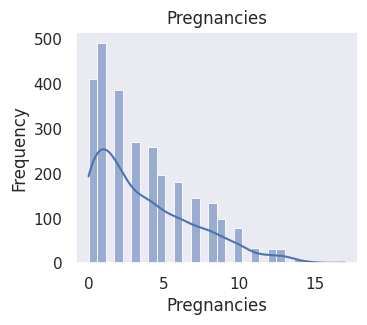

In [128]:
sns.set(style="dark")
# Histogram for BMI
plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='Pregnancies',bins=30, kde=True)
plt.title('Pregnancies')
plt.xlabel('Pregnancies')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

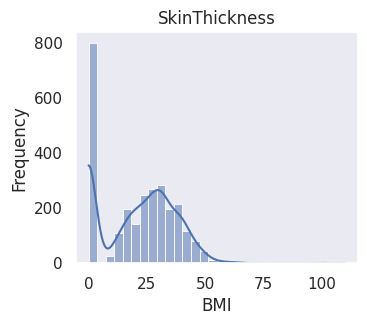

In [129]:
sns.set(style="dark")
# Histogram for BMI
plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='SkinThickness',bins=30, kde=True)
plt.title('SkinThickness')
plt.xlabel('BMI')
plt.ylabel('Frequency')

**Above are the histplots  with a kernel density estimate for all the variables providing a visual representation of its distribution and allowing you to observe the concentration of values and potential patterns in the data.**

# Outliear

<Axes: xlabel='SkinThickness'>

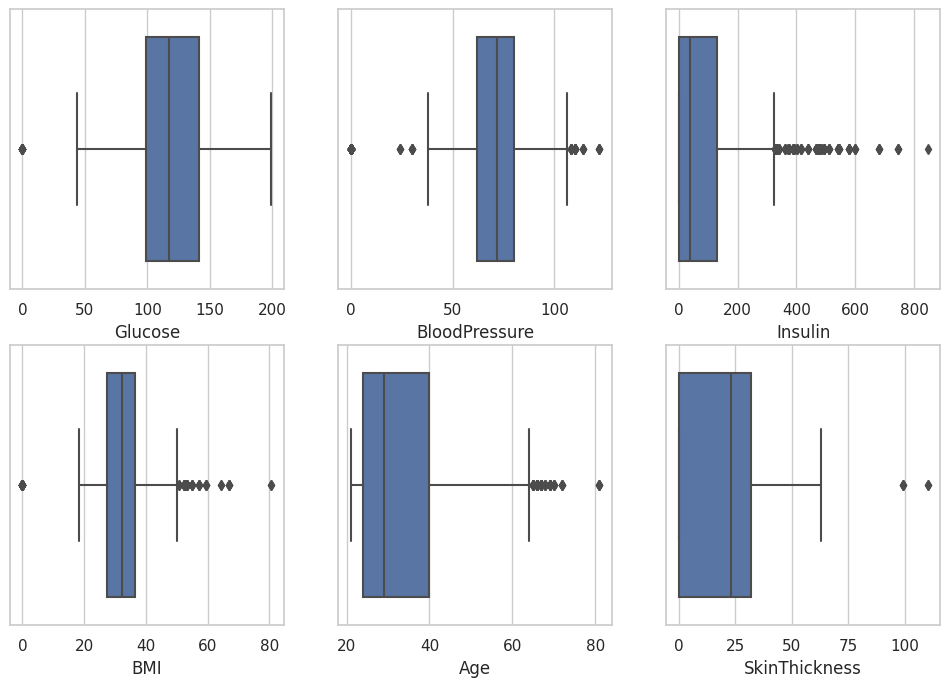

In [130]:
plt.figure(figsize=(12,8))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='Insulin',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='BMI',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='Age',data=data)
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness',data=data)

## Remove Outliear

In [131]:
num_col = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [132]:
no_outlier = data
for i in num_col:
    lower_limit = data[i].quantile(0.5)
    upper_limit = data[i].quantile(0.95)
    no_outlier[i] = no_outlier[i].clip(lower_limit, upper_limit)

Pregnancies                    Axes(0.125,0.747241;0.133621x0.132759)
Glucose                     Axes(0.285345,0.747241;0.133621x0.132759)
BloodPressure                Axes(0.44569,0.747241;0.133621x0.132759)
SkinThickness               Axes(0.606034,0.747241;0.133621x0.132759)
Insulin                     Axes(0.766379,0.747241;0.133621x0.132759)
BMI                            Axes(0.125,0.587931;0.133621x0.132759)
DiabetesPedigreeFunction    Axes(0.285345,0.587931;0.133621x0.132759)
Age                          Axes(0.44569,0.587931;0.133621x0.132759)
Outcome                     Axes(0.606034,0.587931;0.133621x0.132759)
dtype: object

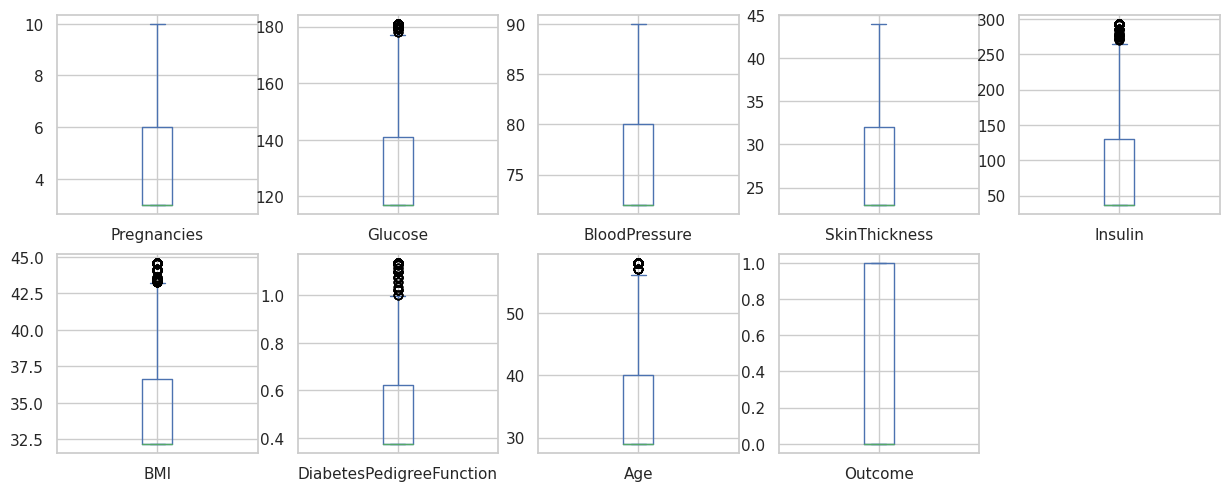

In [133]:
data.plot(kind = "box" , subplots = True , figsize = (15,15) , layout = (5,5))

# Spliting

In [134]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=45)

# Model Accuracy Testing

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models = [LogisticRegression(), DecisionTreeClassifier(),RandomForestClassifier(), KNeighborsClassifier(), GaussianNB()]



In [137]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model} :- \t Accuracy= {accuracy: .2f}")

LogisticRegression() :- 	 Accuracy=  0.70
DecisionTreeClassifier() :- 	 Accuracy=  0.97
RandomForestClassifier() :- 	 Accuracy=  0.98
KNeighborsClassifier() :- 	 Accuracy=  0.67
GaussianNB() :- 	 Accuracy=  0.77


The RandomForestClassifier and DecisionTreeClassifier appears to be the
most effective among all the models with accuracy of 98% and 97%.
The GaussianNB performs well after two above mentioned with 77% accuracy followed by KNeighborsClassifier and LogisticRegression.

In [138]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


In [139]:
from sklearn.metrics import confusion_matrix, classification_report


In [140]:
con = confusion_matrix(y_test,y_pred)
print(con)

[[440   7]
 [ 13 232]]


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

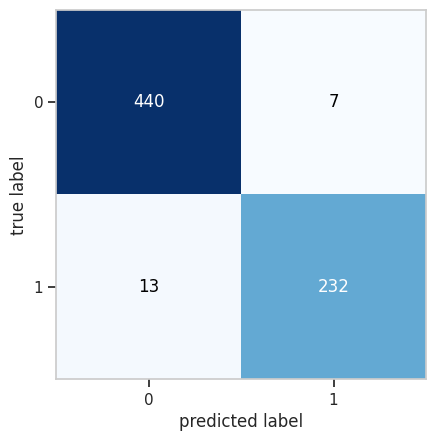

In [141]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold , cross_val_score
plot_confusion_matrix(con)

In [142]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       447
           1       0.97      0.95      0.96       245

    accuracy                           0.97       692
   macro avg       0.97      0.97      0.97       692
weighted avg       0.97      0.97      0.97       692



* The model appears to perform well, with high precision, recall, and F1-scores for both classes.
* The overall accuracy of the model is 97%. This represents the proportion of correctly classified instances out of the total number of instances.
* The weighted average is 97%, suggesting a high overall accuracy.
* F1-score for class 0(No) is 0.98 and F1-score for class 1(Yes) is 0.96 indicating a good balance between precision and recall for both classes.







